# International Food Preferences 


This data was collected during the world cup about preferences for international cuisine. The data tracks knowledge and interest in different international foods of different participants as well as their location, income level, age, and education.


In [40]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt


In [41]:
## First, import csv data file

data = pd.read_csv('food-world-cup-data.csv')


In [42]:
#First I'd like to just compare Food Knowledge and Interest with Age, Education,and Region. So I will create a new data
#with just those parameters. Then I will drop the NaN values to clean up the dataframe. 

data1 = data[['Food Knowledge','International Cuisine Interest','Age','Education','Census Region']]
data2 = data1.dropna(how='any')




What is the breakdown of food knowledge? How many people claim to be advanced, expert, intermediate, or novice? From the bar plot below, it seems that most people identify as Intermediate and then followed by Novice. 


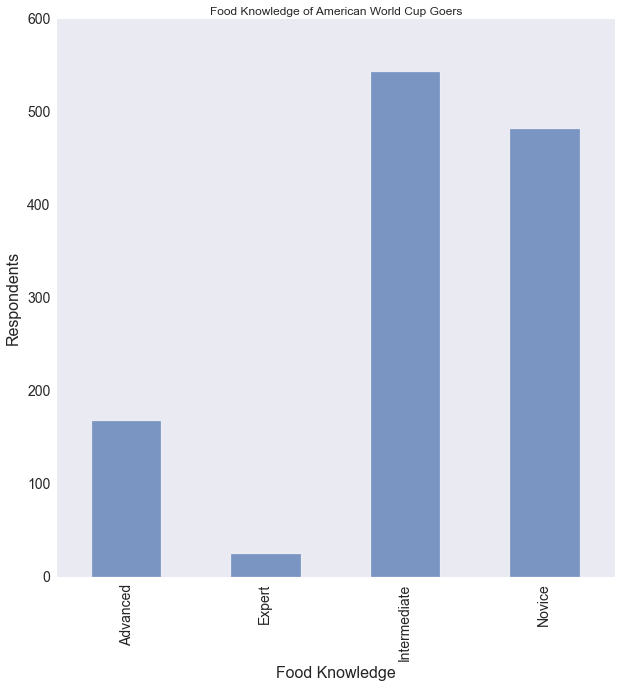

In [43]:
fk = data2.groupby('Food Knowledge').size()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
title = 'Food Knowledge of American World Cup Goers'
my_plot = fk.plot(kind='bar',ax=ax,alpha=0.7,edgecolor='w',title=title,fontsize=14)
ax.grid(False)
ax.set_xlabel('Food Knowledge',fontsize=16)
ax.set_ylabel('Respondents',fontsize=16)


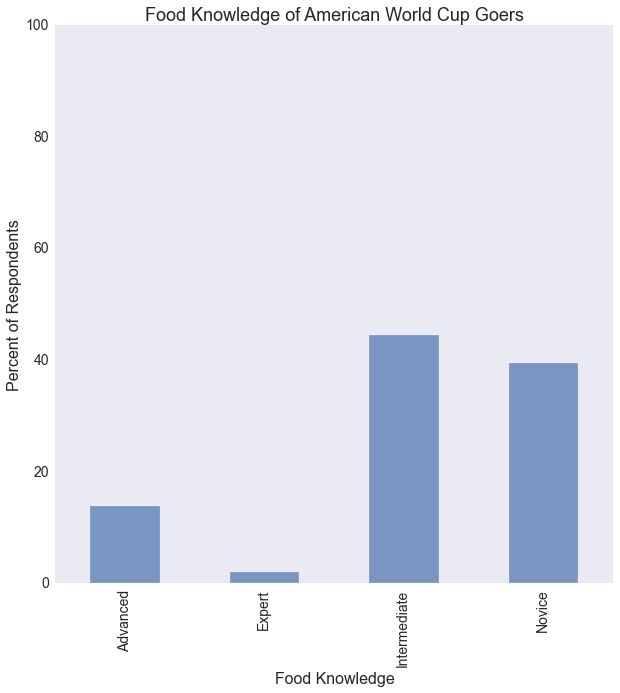

In [44]:
#The graph below represents the same data but in percent form. Again, we conclude that about 45% of people said they had an
#intermediate knowledge of food. 
total = float(data2.groupby('Food Knowledge').size().sum())
total
food_know = data2.groupby('Food Knowledge').size()/total*100

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
my_plot = food_know.plot(kind='bar',ax=ax,alpha=0.7,edgecolor='w',fontsize=14)
ax.grid(False)
ax.set_xlabel('Food Knowledge',fontsize=16)
ax.set_ylabel('Percent of Respondents',fontsize=16)
ax.set_ylim([0,100])
ax.set_title(title,fontsize=18)



What is the the breakdown of international cuisine interest? Are most people interested in international cuisine or not? According to the bar graph showing percent of people interested in International Cuisine, it seems that 48% of people surveyed indicate some interest in International Cuisine.  

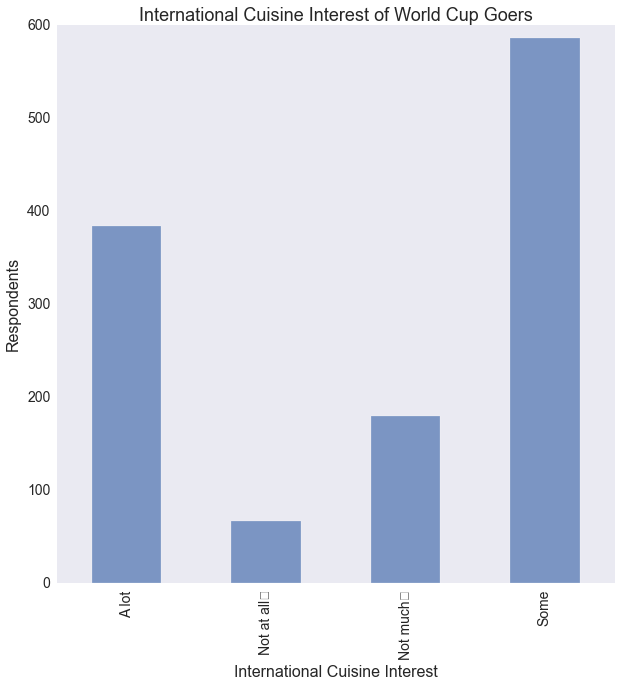

In [45]:
interest = data2.groupby('International Cuisine Interest').size()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
my_plot = interest.plot(kind='bar',ax=ax,alpha=0.7,edgecolor='w',fontsize=14)
ax.grid(False)
title = 'International Cuisine Interest of World Cup Goers'
ax.set_xlabel('International Cuisine Interest',fontsize=16)
ax.set_ylabel('Respondents',fontsize=16)
ax.set_title(title,fontsize=18)




(0, 100)

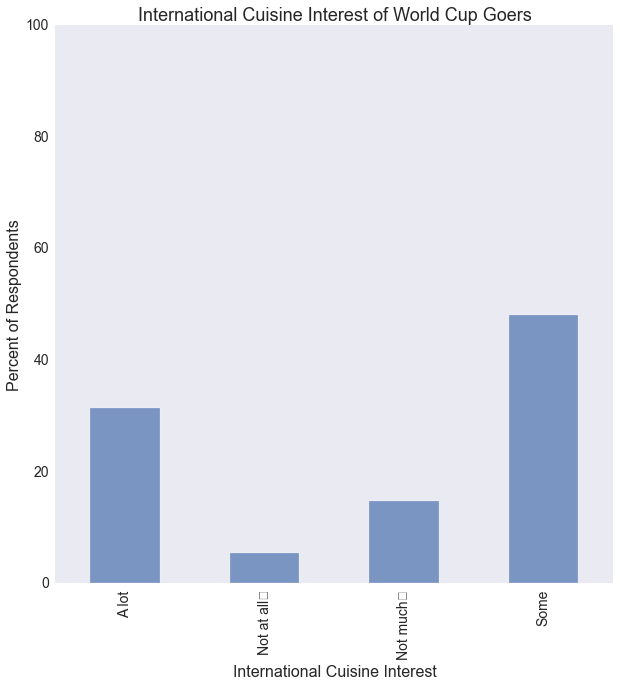

In [46]:
total_int = float(interest.sum())
interest_per = data2.groupby('International Cuisine Interest').size()/total_int*100

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
my_plot = interest_per.plot(kind='bar',ax=ax,alpha=0.7,edgecolor='w',fontsize=14)
ax.grid(False)
title = 'International Cuisine Interest of World Cup Goers'
ax.set_xlabel('International Cuisine Interest',fontsize=16)
ax.set_ylabel('Percent of Respondents',fontsize=16)
ax.set_title(title,fontsize=18)
ax.set_ylim([0,100])


Correlation between Age and International Cuisine Interest 

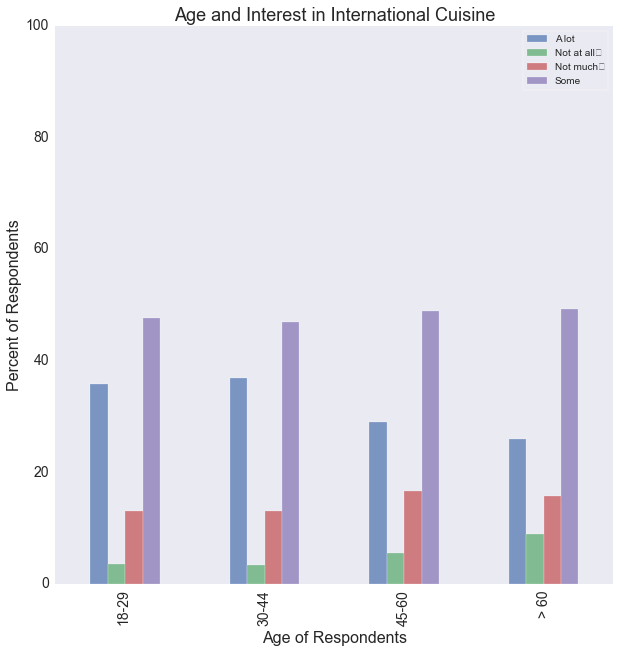

In [47]:
a = data2.groupby(['International Cuisine Interest','Age']).size()
a = a.unstack('Age')
cols = ['18-29','30-44','45-60','> 60']
a[cols] = a[cols].apply(lambda x: x/x.sum()*100)
a = a.stack()
a = a.unstack('International Cuisine Interest')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
my_plot = a.plot(kind='bar',ax=ax,alpha=0.7,edgecolor='w',fontsize=14)
ax.grid(False)
title = 'Age and Interest in International Cuisine'
ax.set_xlabel('Age of Respondents',fontsize=16)
ax.set_ylabel('Percent of Respondents',fontsize=16)
ax.set_title(title,fontsize=18)
ax.set_ylim([0,100])
ax.legend(frameon=True)  ## Why is this not setting the frame on???

In the chart above, it shows that most age groups claim some interst in International Cuisine. As I expected, the percentage of people that indicated 'Not at all' interested in International Cuisine was highest in the 60 and above age group. 

Correlation between Age and Food Knowledge. This is a pretty interesting correlation because I thought that as people got older, they would identify themselves more as experts or advanced in food. Instead, the oldest category had more people that stated that they were novices in food knowledge than in the youngest category. 

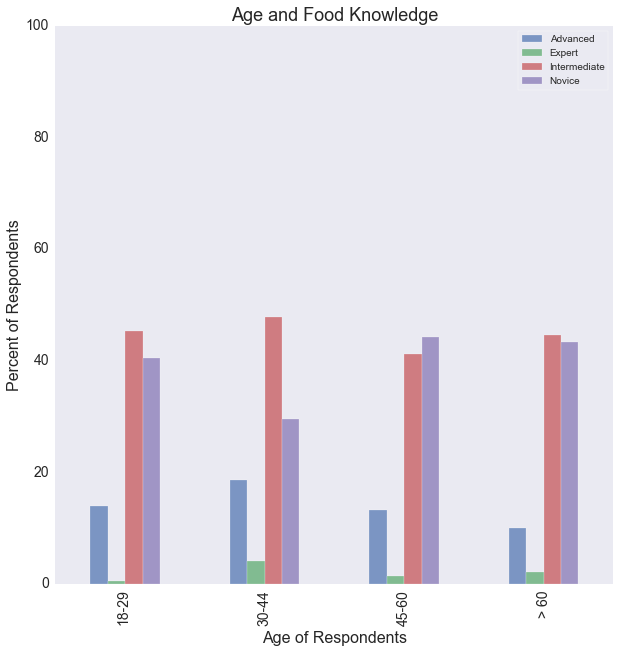

In [55]:
#Convert 
b = data2.groupby(['Food Knowledge','Age']).size()
b = b.unstack('Age')
cols = ['18-29','30-44','45-60','> 60']
b[cols] = b[cols].apply(lambda x: x/x.sum()*100)
b = b.stack()
b = b.unstack('Food Knowledge')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
my_plot = b.plot(kind='bar',ax=ax,alpha=0.7,edgecolor='w',fontsize=14)
ax.grid(False)
title = 'Age and Food Knowledge'
ax.set_xlabel('Age of Respondents',fontsize=16)
ax.set_ylabel('Percent of Respondents',fontsize=16)
ax.set_title(title,fontsize=18)
ax.set_ylim([0,100])
ax.legend(frameon=True)  ## Why is this not setting the frame on???



Now that we've seen some of the broad breakdowns, let's look at the broader data set again and see which cuisines seem to the most popular among all the participants. Since there are over 40 different cuisines listed, I've narrowed the list to cuisines that most Americans are familiar with. 




In [103]:
#First, create a new data table with the cuisines that are generally popular in the United States. I've chosen Italian, Japanese,
# and German. 

inter_foods = data[['Japan','Germany',' Italy']]
inter_foods = inter_foods.dropna(how='any')





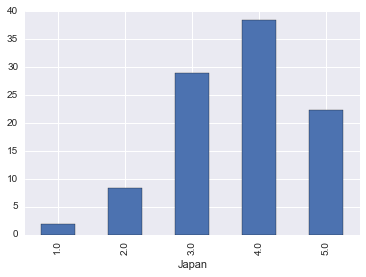

In [114]:
total_j = int(inter_foods.groupby('Japan').size().sum())
japan = inter_foods.groupby('Japan').size()/total_j*100
japan.plot(kind='bar')

## Could not figure out how to graph everything on the same figure
#y = japan.values
#x = japan.axes
#fig = plt.figure(figsize=(10,10))
#ax1 = fig.add_subplot(2,2,1)





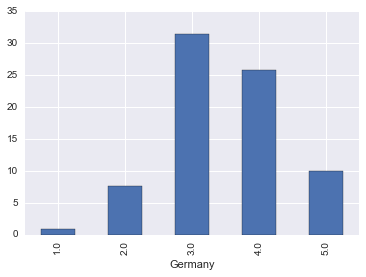

In [51]:
inter_foods = data[['Japan','Germany',' Italy']]
inter_foods = inter_foods.dropna(how='any')
total_g = inter_foods.groupby('Germany').size().sum()
Germany = inter_foods.groupby('Germany').size()/total*100
Germany.plot(kind='bar')


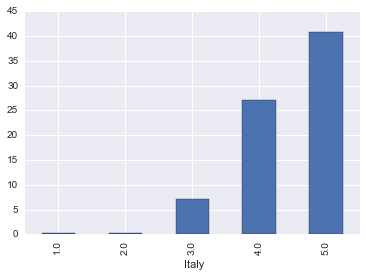

In [52]:
inter_foods = data[['Japan','Germany',' Italy']]
inter_foods = inter_foods.dropna(how='any')
total_i = inter_foods.groupby(' Italy').size().sum()
Italy = inter_foods.groupby(' Italy').size()/total*100
Italy.plot(kind='bar')

In [53]:
inter = data[['Food Knowledge','International Cuisine Interest','Age','Education','Census Region','Japan','Germany',' Italy']]
inter = inter.dropna(how='any')
age = inter[['Age','Japan','Germany',' Italy']]
age18 = age[age.Age == '18-29'].mean(axis=0)
my_data = []
#first age group
age1829 = {}
age1829['age']  = '18-29'
age1829['Japan'] = age18[0]
age1829['Germany'] = age18[1]
age1829['Italy'] = age18[2]
my_data.append(age1829)

#second age group
age30 = age[age.Age == '30-44'].mean(axis=0)
age3044 = {}
age3044['age'] = '30-44'
age3044['Japan'] = age30[0]
age3044['Germany'] = age30[1]
age3044['Italy'] = age30[2]
my_data.append(age3044)

#third age group
age45 = age[age.Age == '45-60'].mean(axis=0)
age4560 = {}
age4560['age'] = '45-60'
age4560['Japan'] = age45[0]
age4560['Germany'] = age45[1]
age4560['Italy'] = age45[2]
my_data.append(age4560)

#fourth age group
age60 = age[age.Age == '> 60'].mean(axis=0)
ageo60 = {}
ageo60['age'] = '>60'
ageo60['Japan'] = age60[0]
ageo60['Germany'] = age60[1]
ageo60['Italy'] = age60[2]
my_data.append(ageo60)

my_data







[{'Germany': 3.568862275449102,
  'Italy': 4.5029940119760479,
  'Japan': 3.8023952095808382,
  'age': '18-29'},
 {'Germany': 3.4170403587443947,
  'Italy': 4.4304932735426013,
  'Japan': 3.8071748878923768,
  'age': '30-44'},
 {'Germany': 3.3513513513513513,
  'Italy': 4.3745173745173744,
  'Japan': 3.6061776061776061,
  'age': '45-60'},
 {'Germany': 3.6086956521739131,
  'Italy': 4.4505928853754941,
  'Japan': 3.6561264822134389,
  'age': '>60'}]

In [117]:
cols = ['Japan','Germany','Italy']
index = ['18-29','30-44','45-60','>60']
y = pd.DataFrame(data=my_data,index=index,columns=cols)
y

##is there an easier way to get to this result? I created a dictionary for each age group with the mean score for each country
#but it seemed like a really tedious way to get the dataframe below.Is there another way I can achieve the same result? 


,Japan,Germany,Italy
18-29,3.802395,3.568862,4.502994
30-44,3.807175,3.417040,4.430493
45-60,3.606178,3.351351,4.374517
>60,3.656126,3.608696,4.450593


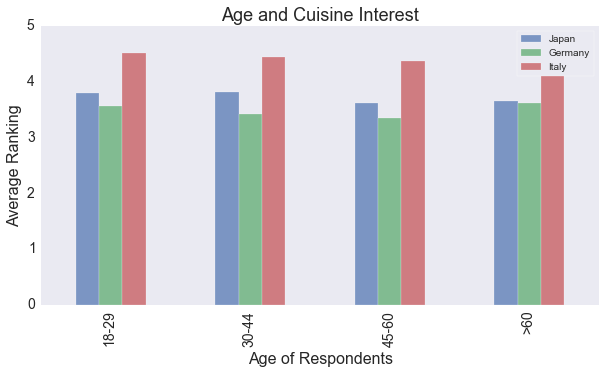

In [122]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
my_plot = y.plot(kind='bar',ax=ax,alpha=0.7,edgecolor='w',fontsize=14)
ax.grid(False)
title = 'Age and Cuisine Interest'
ax.set_xlabel('Age of Respondents',fontsize=16)
ax.set_ylabel('Average Ranking',fontsize=16)
ax.set_title(title,fontsize=18)
ax.set_ylim([0,5])
ax.legend(frameon=True)  ## Why is this not setting the frame on???